In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as tb
from talib import stream
import mplfinance as mpf

from data_utils.get_data import *

from indicators.indicators import *
from indicators.custom_indicators import *
%matplotlib qt

In [2]:
acq_window = 500
reg_window = 100
reg_mean = 75
deviation = 1 / 100

#Price to apply indicators on
price_col = 'Close'


In [3]:
path = './data/csv/EURUSD60.csv'

rates = load_frames(path)
rates.tail()
rates = rates[-acq_window:]

In [4]:
df_HA, keys = create_HA(rates) #Heiken Ashi

In [5]:
mpf.plot(df_HA, type='candle', volume = True, style = 'yahoo',show_nontrading = False)

In [6]:
%%capture
keys_1 = reg_envelopes(df_HA, price_col ,deviation,reg_window,reg_mean)

In [7]:
keys_2 = create_MACD(df_HA)

In [8]:
keys_3 = create_moving_average(df_HA,range1 = 55,range2 = 21)

In [9]:
addp = mpf.make_addplot(df_HA[keys_1])

In [10]:
addp2 = mpf.make_addplot(df_HA[keys_2],panel=2)

In [17]:
addp3 = mpf.make_addplot(df_HA[['MA1','MA2']])

In [18]:
mpf.plot(rates, type='candle', volume = True,addplot = [addp,addp2,addp3], style = 'yahoo',show_nontrading = False)

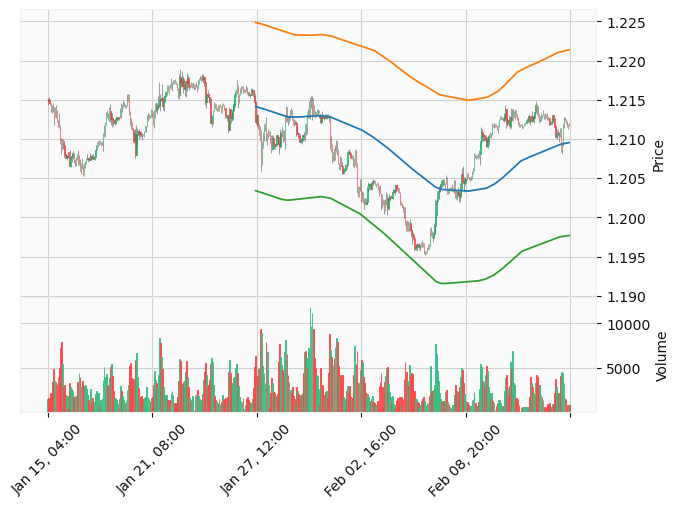

In [7]:
addp = mpf.make_addplot(rates[keys])
mpf.plot(rates, type='candle', volume = True,addplot = addp, style = 'yahoo',show_nontrading = False)

In [8]:
X_buy, X_buy_chart, Y_reg_buy, X_sell, X_sell_chart, Y_reg_sell, X_hold, X_hold_chart, Y_reg_hold = generate_data(rates, 
                                r = 1,
                                test = False,
                                save_img = True,
                                tp = 0.00500, 
                                sl = 0.00250, 
                                sl_h = 0.00150, 
                                window_range_back = 30, 
                                window_range_front = 15)

(9, 30, 9)
(9, 15, 9)
(9, 345, 480, 3)
(6, 30, 9)
(6, 15, 9)
(6, 345, 480, 3)
(17, 30, 9)
(17, 15, 9)
(17, 345, 480, 3)


In [9]:
x = X_buy_chart[0]

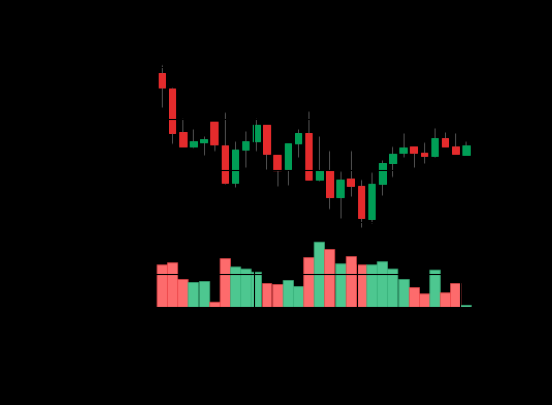

In [10]:
plt.imshow(x)
#Resolution, cropping and grid removal next.